In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [2]:
path = "/content/drive/MyDrive/Diabetes/diabetes_prediction_dataset.csv"

In [3]:
import pandas as pd

df = pd.read_csv(path)

In [4]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


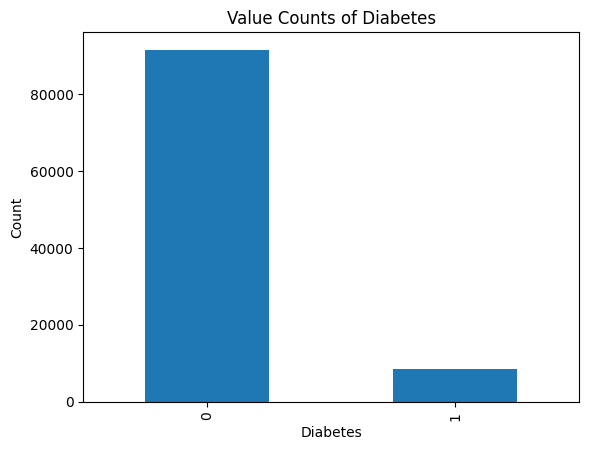

In [5]:
import matplotlib.pyplot as plt

# get the value counts of the 'diabetes' column
counts = df.diabetes.value_counts()

# plot the value counts as a bar chart
counts.plot(kind='bar')

# add labels and title to the plot
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.title('Value Counts of Diabetes')

# show the plot
plt.show()

In [7]:
X = df.drop('diabetes',axis='columns')
y = df.diabetes

In [8]:
X.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,Female,80.0,0,1,never,25.19,6.6,140
1,Female,54.0,0,0,No Info,27.32,6.6,80
2,Male,28.0,0,0,never,27.32,5.7,158
3,Female,36.0,0,0,current,23.45,5.0,155
4,Male,76.0,1,1,current,20.14,4.8,155


In [9]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: diabetes, dtype: int64

In [10]:
X = pd.get_dummies(X)
X.columns

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'gender_Female', 'gender_Male', 'gender_Other',
       'smoking_history_No Info', 'smoking_history_current',
       'smoking_history_ever', 'smoking_history_former',
       'smoking_history_never', 'smoking_history_not current'],
      dtype='object')

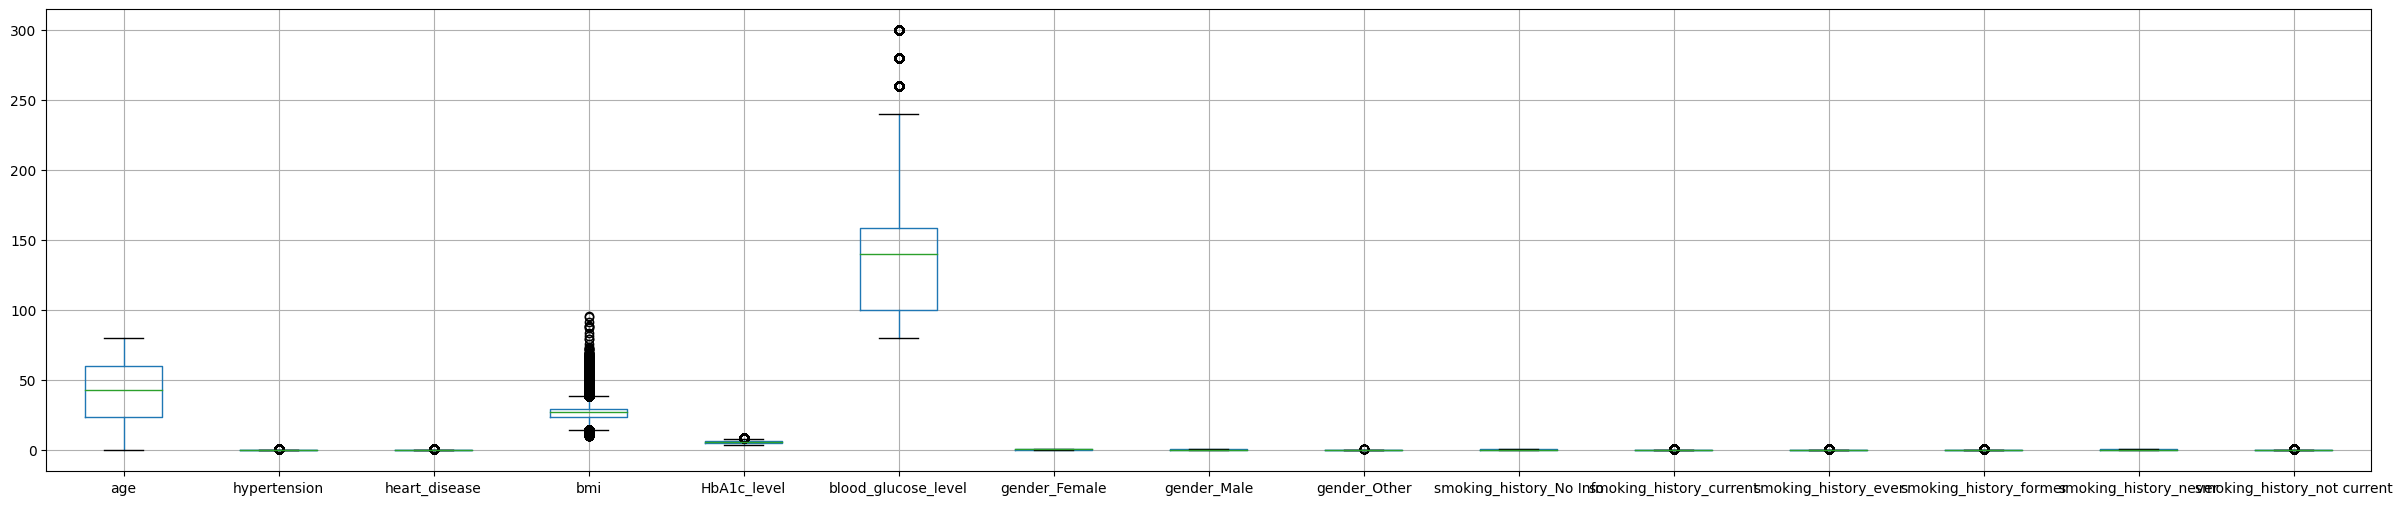

In [11]:
# Create larger figure
fig = plt.figure(figsize=(30, 6))

# Create box plot
X.boxplot()

# Show plot
plt.show()

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [14]:
X_scaled

array([[ 1.69270354, -0.28443945,  4.93637859, ..., -0.32119822,
         1.35992968, -0.26251249],
       [ 0.53800643, -0.28443945, -0.20257766, ..., -0.32119822,
        -0.73533214, -0.26251249],
       [-0.61669069, -0.28443945, -0.20257766, ..., -0.32119822,
         1.35992968, -0.26251249],
       ...,
       [ 1.07094356, -0.28443945, -0.20257766, ...,  3.11334224,
        -0.73533214, -0.26251249],
       [-0.7943364 , -0.28443945, -0.20257766, ..., -0.32119822,
         1.35992968, -0.26251249],
       [ 0.67124071, -0.28443945, -0.20257766, ..., -0.32119822,
        -0.73533214, -0.26251249]])

In [13]:
X_scaled.shape

(100000, 15)

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify = y, test_size=0.25, random_state=42)

In [16]:
print(X_train.shape, X_test.shape , y_train.shape, y_test.shape)

(75000, 15) (25000, 15) (75000,) (25000,)


In [17]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
#Create an instance
classifier = BalancedBaggingClassifier(estimator=DecisionTreeClassifier(),
                                sampling_strategy='not majority',
                                replacement=False,
                                random_state=42)
history = classifier.fit(X_train, y_train)
bc_preds = classifier.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [20]:
print("Balanced Bagging Accuracy:", accuracy_score(y_test, bc_preds))

Balanced Bagging Accuracy: 0.96876


In [22]:
print("\nBalanced Bagging Confusion Matrix:")
bc_cm = confusion_matrix(y_test, bc_preds)
print(bc_cm)


Balanced Bagging Confusion Matrix:
[[22731   144]
 [  637  1488]]


In [23]:
classifier.score(X_test,y_test)

0.96876

In [30]:
from sklearn.model_selection import cross_val_score

#scores = cross_val_score(classifier,X_scaled,y,cv=5)
scores = cross_val_score(classifier,X,y,cv=5)

In [31]:
scores

array([0.97225, 0.97285, 0.96965, 0.9733 , 0.97205])

In [28]:
scores.mean()

0.9681000000000001

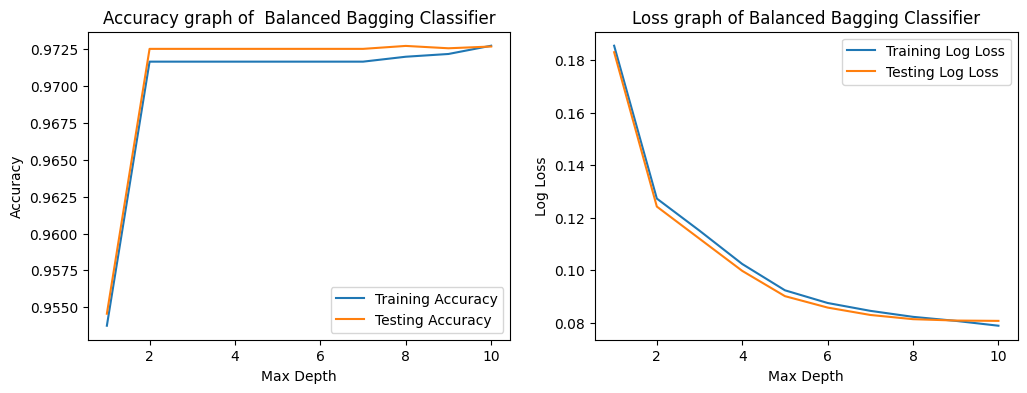

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, log_loss

# create lists to store the training and testing accuracies and losses
train_acc = []
test_acc = []
train_loss = []
test_loss = []

# fit the classifier for different values of max_depth
for depth in range(1, 11):
    # create an instance of the classifier with a different max_depth
    classifier = BalancedBaggingClassifier(estimator=DecisionTreeClassifier(max_depth=depth),
                                    sampling_strategy='not majority',
                                    replacement=False,
                                    random_state=42)
    # fit the classifier to the training data
    classifier.fit(X_train, y_train)
    
    # predict the class labels for the training and testing data
    train_preds = classifier.predict(X_train)
    test_preds = classifier.predict(X_test)
    
    # calculate the training and testing accuracies
    train_accuracy = accuracy_score(y_train, train_preds)
    test_accuracy = accuracy_score(y_test, test_preds)
    
    # calculate the training and testing log losses
    train_proba = classifier.predict_proba(X_train)
    test_proba = classifier.predict_proba(X_test)
    train_log_loss = log_loss(y_train, train_proba)
    test_log_loss = log_loss(y_test, test_proba)
    
    # append the accuracies and losses to the lists
    train_acc.append(train_accuracy)
    test_acc.append(test_accuracy)
    train_loss.append(train_log_loss)
    test_loss.append(test_log_loss)

# plot the training and testing accuracies and losses as a function of max_depth
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(range(1, 11), train_acc, label='Training Accuracy')
ax[0].plot(range(1, 11), test_acc, label='Testing Accuracy')
ax[0].set_xlabel('Max Depth')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Accuracy graph of  Balanced Bagging Classifier')
ax[0].legend()

ax[1].plot(range(1, 11), train_loss, label='Training Log Loss')
ax[1].plot(range(1, 11), test_loss, label='Testing Log Loss')
ax[1].set_xlabel('Max Depth')
ax[1].set_ylabel('Log Loss')
ax[1].set_title('Loss graph of Balanced Bagging Classifier')
ax[1].legend()

plt.show()



In [32]:
import joblib

save_bbc = joblib.dump(classifier,'bbc_no_upscale.pkl')
save_scaler = joblib.dump(scaler,'scaler_no_upscale.pkl')